In [1]:

pip install xgboost

     ---------------------------------------- 70.9/70.9 MB 5.3 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [2]:
from xgboost import XGBRegressor
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt


In [4]:
boston = load_boston()
x,y = boston.data,boston.target



In [5]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.15)

xgbr = XGBRegressor(verbosity=0)
print(xgbr)



XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)


In [6]:
xgbr.fit(xtrain,ytrain)
score=xgbr.score(xtrain,ytrain)
print('training score is:',score)



training score is: 0.9999915480405415


In [7]:
cv_score = cross_val_score(xgbr,xtrain,ytrain,cv=10)
print('cv mean score is:',cv_score.mean())



cv mean score is: 0.8494425268881518


In [8]:
ypred=xgbr.predict(xtest)
mse=mean_squared_error(ytest,ypred)
print('MSE is:',mse)
print('rmse is:',mse*(1/2.0))



MSE is: 8.43099101349081
rmse is: 4.215495506745405


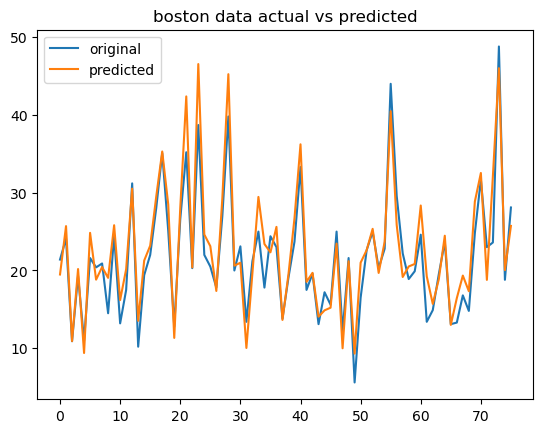

In [9]:
x_ax=range(len(ytest))
plt.plot(x_ax,ytest,label='original')
plt.plot(x_ax,ypred,label='predicted')
plt.title('boston data actual vs predicted')
plt.legend()
plt.show()
